# 0. 데이터셋 출처

Papanicolaou M, Parker AL, Yam M, Filipe EC et al. Temporal profiling of the breast tumour microenvironment reveals collagen XII as a driver of metastasis. Nat Commun 2022

In [1]:
library(tidyverse)
library(ggpubr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df <- read_csv("../output/230210_GSE176078.csv")
head(df)

Rows: 100064 Columns: 23
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (10): NAME, Patient, celltype_major, celltype_minor, celltype_subset, su...
dbl (13): Percent_mito, nCount_RNA, nFeature_RNA, X, Y, TIGIT, CD226, PVR, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


NAME,Patient,Percent_mito,nCount_RNA,nFeature_RNA,celltype_major,celltype_minor,celltype_subset,subtype,gene_module,⋯,X,Y,TIGIT,CD226,PVR,PVRL2,HLA-G,LILRB2,LILRB1,LILRB4
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CID3586_AAGACCTCAGCATGAG,CID3586,1.506221,4581,1689,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-7.988275,-8.241252,0,0,0.000000,1.157802,1.157802,0,0,0
CID3586_AAGGTTCGTAGTACCT,CID3586,5.793743,1726,779,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-7.112645,-8.122277,0,0,0.000000,0.000000,0.000000,0,0,0
CID3586_ACCAGTAGTTGTGGCC,CID3586,1.383238,1229,514,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-7.501827,-8.194180,0,0,0.000000,0.000000,0.000000,0,0,0
CID3586_ACCCACTAGATGTCGG,CID3586,1.923077,1352,609,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-7.879617,-8.264146,0,0,0.000000,0.000000,0.000000,0,0,0
CID3586_ACTGATGGTCAACTGT,CID3586,13.325541,1711,807,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-6.750463,-9.011130,0,0,1.923451,1.923451,0.000000,0,0,0
CID3586_ACTTGTTAGGGAAACA,CID3586,3.610354,1468,764,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,⋯,-6.965269,-8.140739,0,0,0.000000,2.055660,0.000000,0,0,0


In [3]:
dim(df)

[1] 100064     23

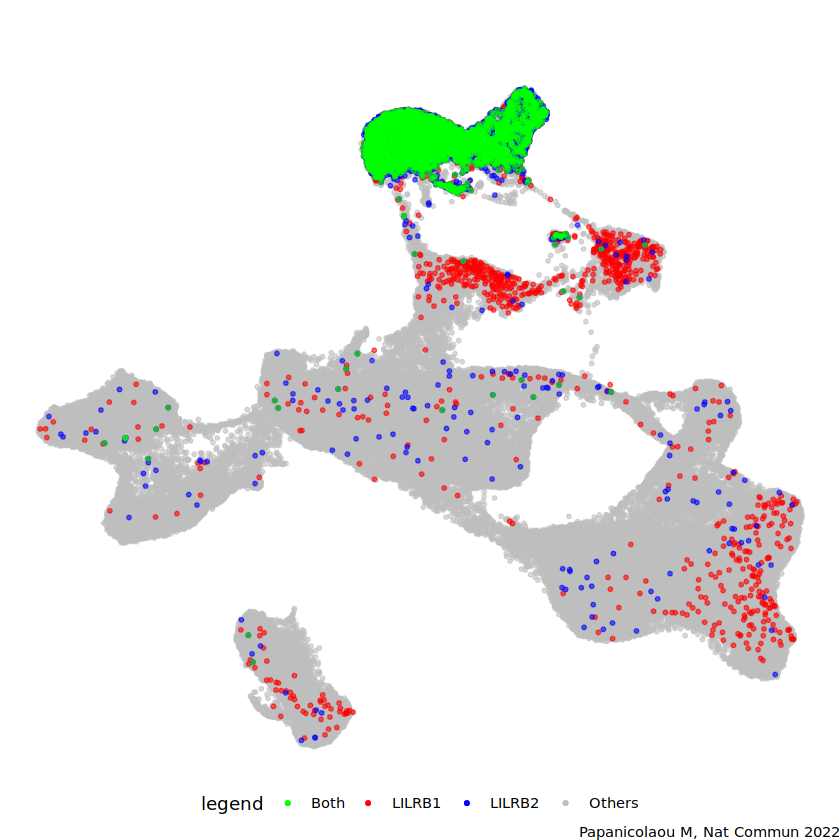

In [21]:
library(ggplot2)
#Code
# No data for centers so can not add that to the plot. You are right in the fact that the continuous variable is messing the plot. Instead set it as factor() and use scale_color_manual() to change the colors. Here the code:

data_other <- df %>% filter(LILRB1==0, LILRB2==0) 
data_1 <- df %>% filter(LILRB1>0)
data_2 <- df %>% filter(LILRB2>0)
data_3 <- df %>% filter(LILRB1>0 & LILRB2>0)

cols <- c("Others"="grey","LILRB1"="red","LILRB2"="blue", "Both"="green")

ggplot() + 
  geom_point(data_other, mapping=aes(x=X, y=Y, color = 'Others',), size=1, alpha = 0.6) +
  geom_point(data_1, mapping=aes(x=X, y=Y, color = 'LILRB1'), size=1, alpha = 0.6) +
  geom_point(data_2, mapping=aes(x=X, y=Y, color = 'LILRB2'), size=1, alpha = 0.6) +
  geom_point(data_3, mapping=aes(x=X, y=Y, color = 'Both'), size=1, alpha = 0.6) +
  ylab("") + xlab("") + theme_void() +
  scale_color_manual(name="legend", values=cols) + theme(legend.position = "bottom")+
  labs(title = "", subtitle = "", caption = "Papanicolaou M, Nat Commun 2022")

In [16]:
data_3 %>% select(
    celltype_major, celltype_minor, celltype_subset,
    LILRB1, LILRB2, LILRB4) %>%
  count(celltype_major)

celltype_major,n
<chr>,<int>
B-cells,14
CAFs,4
Cancer Epithelial,12
Endothelial,2
Myeloid,2748
Plasmablasts,2
PVL,1
T-cells,7


In [18]:
data_3 %>% select(
    celltype_major, celltype_minor, celltype_subset,
    LILRB1, LILRB2, LILRB4) %>%
  filter(celltype_major == "Myeloid") %>%
  count(celltype_minor)

celltype_minor,n
<chr>,<int>
Cycling_Myeloid,146
DCs,59
Macrophage,1813
Monocyte,730


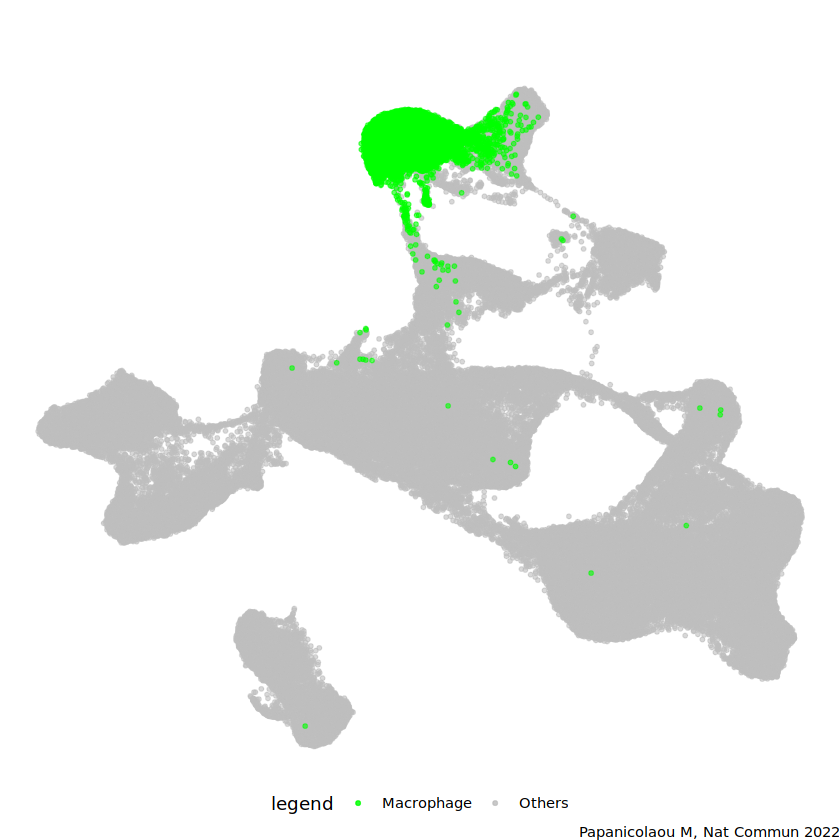

In [20]:

data_other <- df %>% filter(!celltype_minor == "Macrophage") 
data_1 <- df %>% filter(celltype_minor == "Macrophage")


cols <- c("Others"="grey","Macrophage"="green")

ggplot() + 
  geom_point(data_other, mapping=aes(x=X, y=Y, color = 'Others',), size=1, alpha = 0.6) +
  geom_point(data_1, mapping=aes(x=X, y=Y, color = 'Macrophage'), size=1, alpha = 0.6) +
  ylab("") + xlab("") + theme_void() +
  scale_color_manual(name="legend", values=cols) + theme(legend.position = "bottom") +
  labs(title = "", subtitle = "", caption = "Papanicolaou M, Nat Commun 2022")

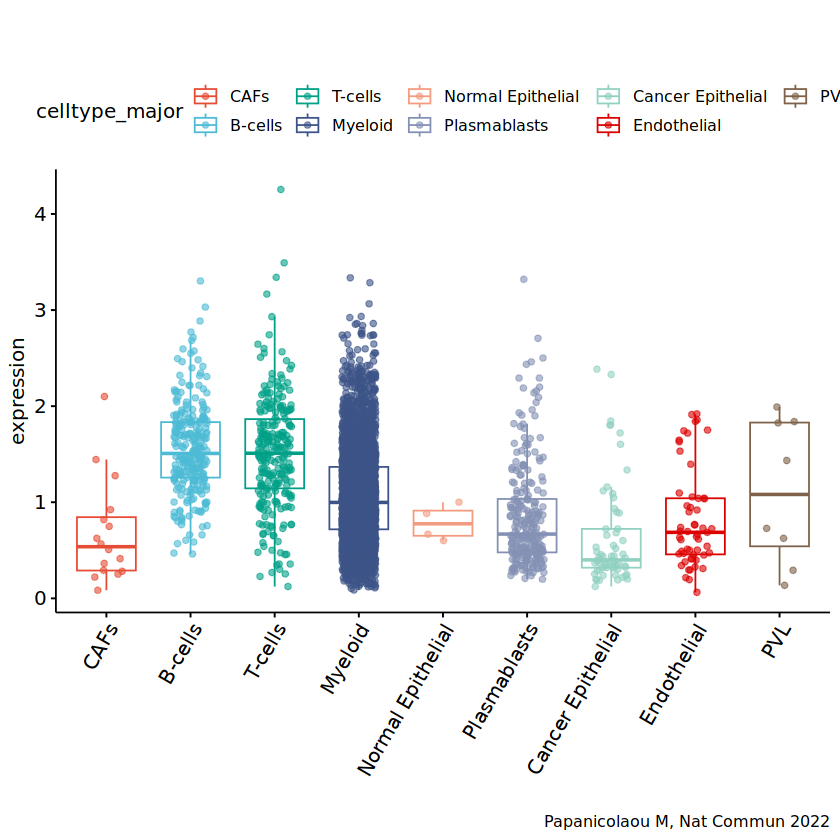

In [22]:
data <- df %>% filter(LILRB1 > 0)

ggboxplot(
    data=data,
    x="celltype_major", y="LILRB1", color = "celltype_major", 
    xlab="",ylab="expression",title="LILRB1 expression in HER2+ breast cancer",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg") + 
  rotate_x_text(60) +
  labs(title = "", subtitle = "", caption = "Papanicolaou M, Nat Commun 2022")

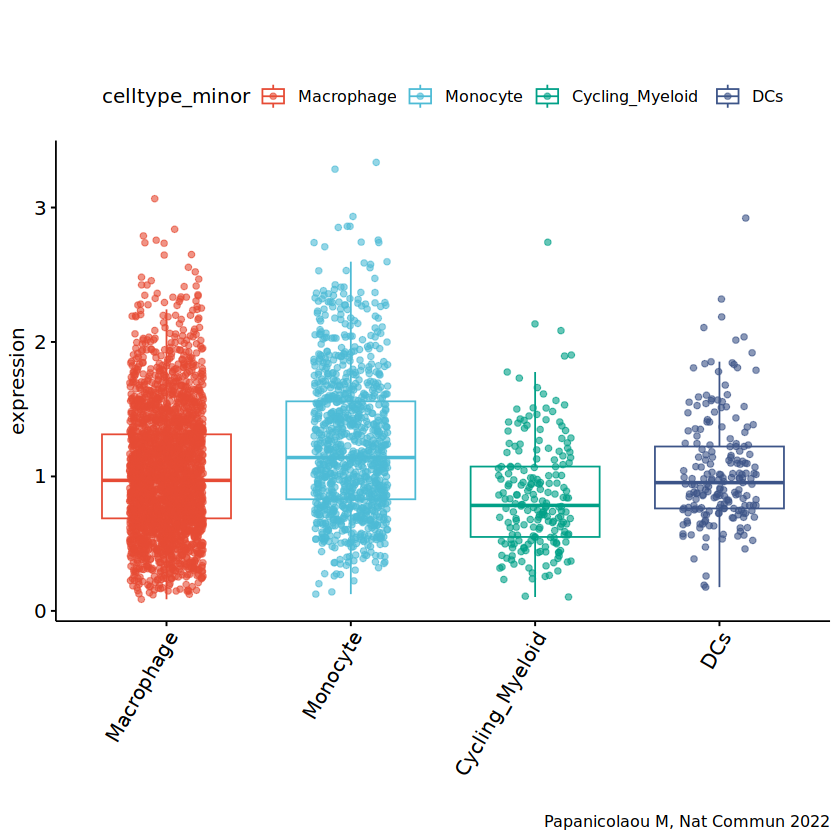

In [23]:
data <- df %>% filter(celltype_major=="Myeloid", LILRB1 >0)

ggboxplot(
    data=data,
    x="celltype_minor", y="LILRB1", color = "celltype_minor", 
    xlab="",ylab="expression",title="LILRB1 expression in HER2+ breast cancer",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",) +
  rotate_x_text(60) +
  labs(title = "", subtitle = "", caption = "Papanicolaou M, Nat Commun 2022")